## Disclaimer

This notebook contains a few exploratory attempts to construct bayesian models to address the problem at hand.


### 1. Bayesian Logistic regression

Implemented in PyMC3, this Logistic regression produces not only a point-prediction for purchase probability but a whole distribution. This captures how much uncertainty there still is about a certain product and can be used for a decision to explore this product more / less.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
product_df = pd.read_csv("../products4.csv")
product_df.head()

,id,age,wealth,diapers,beer,lollipops,raspberries
0,0,0.410396,0.323157,True,False,False,False
1,1,0.126962,0.305107,False,False,True,False
2,2,0.816305,0.074308,False,False,False,False
3,3,0.071864,0.578369,False,False,False,False
4,4,0.773063,0.390198,False,False,False,False


In [3]:
import pymc3 as pm
with pm.Model() as pooled_model:

    # sample a and b
    b0 = pm.Normal('b0', mu=0, sd=50)
    b1 = pm.Normal('b1', mu=0, sd=50)
    b2 = pm.Normal('b2', mu=0, sd=50)

    # compute the purchase probability for each incidence
    prob = pm.Deterministic('prob', pm.invlogit(b0 + b1 * product_df['age'] + b2 * product_df['wealth']))
    likelihood = pm.Bernoulli('likelihood', p=prob, observed=product_df['diapers'])
    posterior = pm.sample(draws=2500)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b2, b1, b0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:05<00:00, 2310.72draws/s]


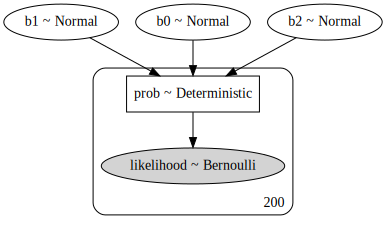

In [4]:
pm.model_to_graphviz(pooled_model)

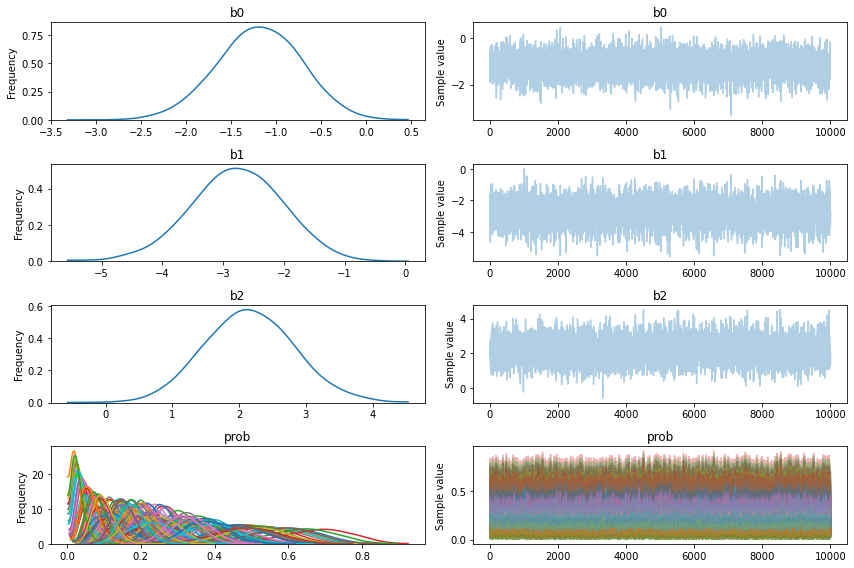

In [9]:
pm.traceplot(posterior, combined=True);

In [6]:
post_df = pm.trace_to_dataframe(posterior)
post_df.head()

,b0,b1,b2,prob__0,prob__1,prob__2,prob__3,prob__4,prob__5,prob__6,...,prob__190,prob__191,prob__192,prob__193,prob__194,prob__195,prob__196,prob__197,prob__198,prob__199
0,-1.667723,-1.627303,2.675860,0.186815,0.257710,0.057472,0.441018,0.132204,0.106748,0.276239,...,0.366298,0.100518,0.049917,0.161282,0.234215,0.211382,0.318871,0.266122,0.143334,0.256274
1,-0.832939,-3.049403,1.958798,0.189786,0.349224,0.040055,0.520196,0.081211,0.067323,0.272285,...,0.427984,0.062410,0.026115,0.097902,0.157960,0.165950,0.359343,0.208579,0.103100,0.187469
2,-1.208600,-2.522106,1.906489,0.164164,0.279463,0.042058,0.428691,0.082078,0.068777,0.232376,...,0.351183,0.064354,0.029999,0.097703,0.149292,0.151850,0.296884,0.188324,0.099278,0.172579
3,-1.292025,-2.955474,2.199500,0.142564,0.269694,0.028164,0.442186,0.061888,0.050224,0.215403,...,0.351450,0.046412,0.018824,0.076079,0.126233,0.129231,0.288543,0.166972,0.077811,0.150269
4,-1.460043,-2.177877,2.097027,0.157604,0.250353,0.043855,0.400424,0.089039,0.073935,0.225946,...,0.328044,0.069407,0.033551,0.106593,0.159558,0.155853,0.279435,0.194115,0.103618,0.180945


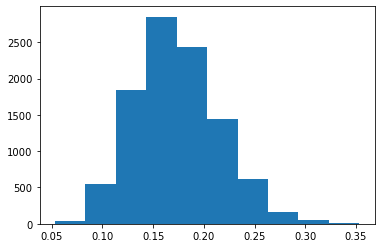

In [16]:
import numpy as np

age = 0.3
wealth = 0.2

utility = post_df['b0'] + post_df['b1'] * age + post_df['b2'] * wealth  
predicted_probability = np.exp(utility) / (1 + np.exp(utility))
plt.hist(predicted_probability)
plt.show()

### for raspberries

In [11]:
import pymc3 as pm
with pm.Model() as pooled_model_rasp:

    # sample a and b
    b0 = pm.Normal('b0', mu=0, sd=50)
    b1 = pm.Normal('b1', mu=0, sd=50)
    b2 = pm.Normal('b2', mu=0, sd=50)

    # compute the purchase probability for each incidence
    prob = pm.Deterministic('prob', pm.invlogit(b0 + b1 * product_df['age'] + b2 * product_df['wealth']))
    likelihood = pm.Bernoulli('likelihood', p=prob, observed=product_df['raspberries'])
    posterior_rasp = pm.sample(draws=2500)




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b2, b1, b0]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:11<00:00, 1072.41draws/s]
The number of effective samples is smaller than 25% for some parameters.


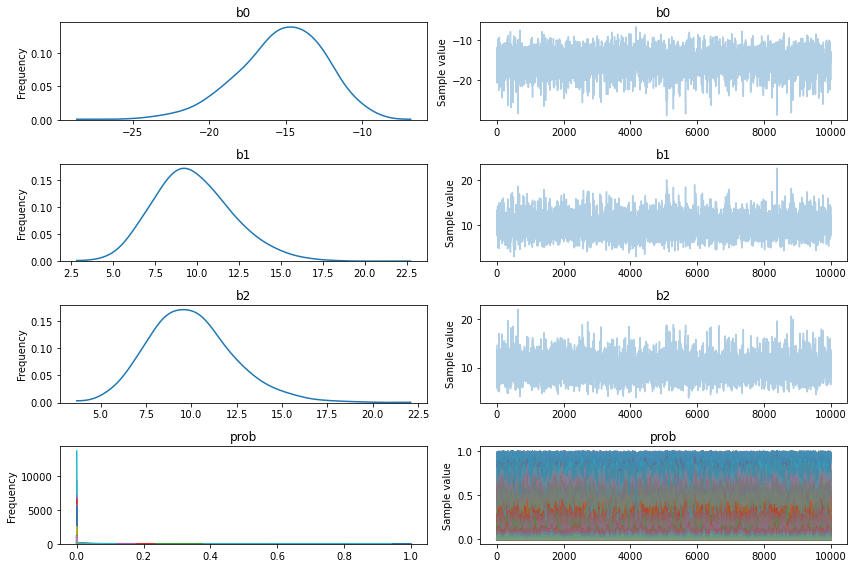

In [14]:
pm.traceplot(posterior_rasp, combined=True);

In [15]:
post_rasp_df = pm.trace_to_dataframe(posterior_rasp)
post_rasp_df.head()

,b0,b1,b2,prob__0,prob__1,prob__2,prob__3,prob__4,prob__5,prob__6,...,prob__190,prob__191,prob__192,prob__193,prob__194,prob__195,prob__196,prob__197,prob__198,prob__199
0,-20.319941,11.352688,14.614453,0.000018,5.465684e-07,0.000047,0.000016,0.002897,0.001010,0.000099,...,0.000014,0.000992,0.000783,0.007050,0.009247,0.000834,0.000019,0.002261,0.000585,0.004838
1,-20.242739,11.349497,14.346336,0.000018,5.438383e-07,0.000050,0.000015,0.002812,0.001002,0.000094,...,0.000013,0.000988,0.000815,0.006707,0.008559,0.000793,0.000018,0.002096,0.000572,0.004471
2,-13.014891,9.754950,5.943003,0.000832,4.710282e-05,0.009851,0.000140,0.040904,0.028880,0.001280,...,0.000196,0.031233,0.072807,0.052771,0.033885,0.008476,0.000321,0.010757,0.012827,0.018958
3,-12.252678,9.999152,6.105604,0.002074,1.094097e-04,0.025665,0.000334,0.105240,0.075089,0.003232,...,0.000473,0.081029,0.179719,0.134074,0.088002,0.022168,0.000784,0.028230,0.033601,0.049774
4,-13.123754,9.406660,7.079141,0.000934,5.716171e-05,0.007253,0.000236,0.043541,0.027961,0.001750,...,0.000297,0.029585,0.054428,0.061232,0.045918,0.010663,0.000457,0.015182,0.013733,0.026561


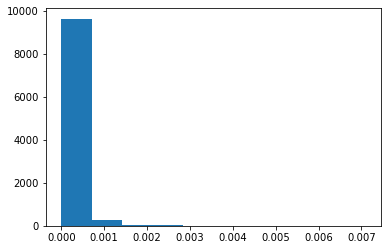

In [18]:
import numpy as np

age = 0.3
wealth = 0.2

utility = post_rasp_df['b0'] + post_rasp_df['b1'] * age + post_rasp_df['b2'] * wealth  
predicted_probability = np.exp(utility) / (1 + np.exp(utility))
plt.hist(predicted_probability)
plt.show()

## Graphical model

A more complex model that implements step-like swithpoints with flexible thresholds. 
Appears too complex (too many parameters) for the available data, but may provide inspiration for further exploration.

In [10]:
import theano.tensor as tt

In [11]:
age = product_df['age'].values
wealth = product_df['wealth'].values
purchases = product_df['diapers'].values

In [12]:
import pymc3 as pm
with pm.Model() as graph_model:
    
    age_data = pm.Data("age_data", age)
    wealth_data = pm.Data("wealth_data", wealth)
    purchases_data = pm.Data("purchases_data", purchases)

    # set the prior distribution
    prob_ha_hw = pm.Uniform("prob_ha_hw", lower=0, upper=1.0)
    prob_la_hw = pm.Uniform("prob_la_hw", lower=0, upper=1.0)
    prob_ha_lw = pm.Uniform("prob_ha_lw", lower=0, upper=1.0)
    prob_la_lw = pm.Uniform("prob_la_lw", lower=0, upper=1.0)
    
    
    age_thr = pm.Uniform("age_thr", lower=0, upper=1.0)
    wealth_thr = pm.Uniform("wealth_thr", lower=0, upper=1.0)
    
    # set switchpoints
    switch_age_hw = pm.math.switch(age >= age_thr, prob_ha_hw, prob_la_hw)
    switch_age_lw = pm.math.switch(age >= age_thr, prob_ha_lw, prob_la_lw)
    switch_wealth = pm.math.switch(wealth >= wealth_thr, switch_age_hw, switch_age_lw)

    # set likelihood
    like = pm.Bernoulli('likelihood', p = switch_wealth, observed=purchases)

    posterior = pm.sample(draws=5000)




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [wealth_thr, age_thr, prob_la_lw, prob_ha_lw, prob_la_hw, prob_ha_hw]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [13:14<00:00, 27.69draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.7185854687469545, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples

/Users/vadim/anaconda3/envs/myenv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/vadim/anaconda3/envs/myenv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/vadim/anaconda3/envs/myenv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/vadim/anaconda3/envs/myenv/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not ef

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839c482ed0>,
      dtype=object)

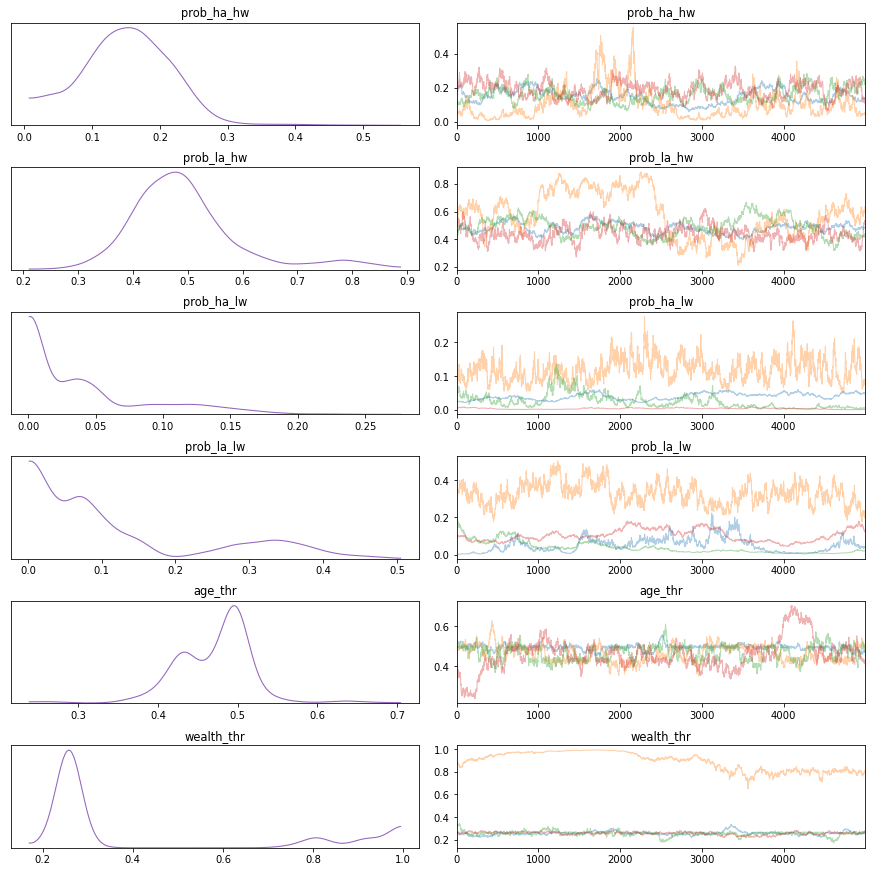

In [13]:
pm.traceplot(posterior, combined = True)

In [15]:
with graph_model:
    pm.set_data({
        'age_data': [0.3],
        'wealth_data': [0.2],
    })
    samples = pm.sample_posterior_predictive(posterior, samples=2000, progressbar=True)

/Users/vadim/anaconda3/envs/myenv/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:03<00:00, 607.18it/s]


In [18]:
samples['likelihood'].mean()

0.2559125